In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Load flowers dataset

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/2713683760_d98cd2a05b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8671682526_7058143c99.jpg'),
 PosixPath('datasets/flower_photos/roses/9320934277_4fb95aef5d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8644003462_2272de26eb.jpg'),
 PosixPath('datasets/flower_photos/roses/9164924345_6b63637acf.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2713683760_d98cd2a05b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8671682526_7058143c99.jpg'),
 PosixPath('datasets/flower_photos/roses/9320934277_4fb95aef5d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8644003462_2272de26eb.jpg'),
 PosixPath('datasets/flower_photos/roses/9164924345_6b63637acf.jpg')]

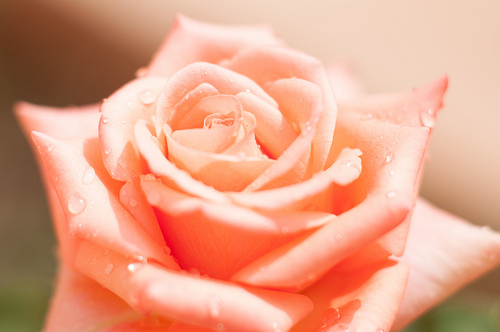

In [ ]:
PIL.Image.open(str(roses[1]))

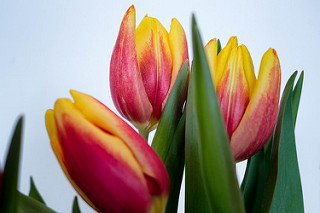

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

Read flowers images from disk into numpy array using opencv

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/2713683760_d98cd2a05b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8671682526_7058143c99.jpg'),
 PosixPath('datasets/flower_photos/roses/9320934277_4fb95aef5d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8644003462_2272de26eb.jpg'),
 PosixPath('datasets/flower_photos/roses/9164924345_6b63637acf.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/2713683760_d98cd2a05b_m.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(219, 240, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X , y = [], []

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180, 180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


Preprocessing: scale images

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Build convolutional neural network and train it

In [ ]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)


Epoch 1/30
86/86 [==============================] - 14s 43ms/step - loss: 1.3678 - accuracy: 0.4164
Epoch 2/30
86/86 [==============================] - 4s 44ms/step - loss: 0.9998 - accuracy: 0.6061
Epoch 3/30
86/86 [==============================] - 4s 43ms/step - loss: 0.8208 - accuracy: 0.6893
Epoch 4/30
86/86 [==============================] - 4s 43ms/step - loss: 0.6750 - accuracy: 0.7471
Epoch 5/30
86/86 [==============================] - 4s 43ms/step - loss: 0.5035 - accuracy: 0.8140
Epoch 6/30
86/86 [==============================] - 4s 43ms/step - loss: 0.3198 - accuracy: 0.8870
Epoch 7/30
86/86 [==============================] - 4s 43ms/step - loss: 0.2221 - accuracy: 0.9339
Epoch 8/30
86/86 [==============================] - 4s 43ms/step - loss: 0.1711 - accuracy: 0.9462
Epoch 9/30
86/86 [==============================] - 4s 44ms/step - loss: 0.0667 - accuracy: 0.9818
Epoch 10/30
86/86 [==============================] - 4s 44ms/step - loss: 0.0310 - accuracy: 0.9953
Epoch 11

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 29ms/step - loss: 2.8996 - accuracy: 0.6754


[2.899601459503174, 0.6753812432289124]

Here we see that while train accuracy is very high , the test accuracy is significantly low (67%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

array([[ -8.692201  ,  -3.8197477 , -11.145599  ,  10.7676525 ,
          3.865911  ],
       [ 22.903168  ,   4.323157  , -14.405792  , -16.79273   ,
          9.123269  ],
       [ -2.0777006 , -11.140708  ,   9.915991  ,   6.677245  ,
         -5.4727087 ],
       ...,
       [  0.53308547,  -3.1625957 ,   3.1719117 ,   3.5217764 ,
         -2.8248036 ],
       [ 23.33191   ,  -1.4592662 , -22.15555   , -17.065424  ,
          8.183279  ],
       [ -3.357638  , -14.202471  ,  14.900216  ,   8.57222   ,
         -1.4530886 ]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

3

In [ ]:
y_test[0]

1

# Improve Test Accuracy Using Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

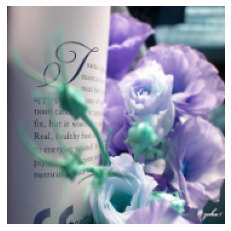

In [ ]:
plt.axis('off')
plt.imshow(X[0])

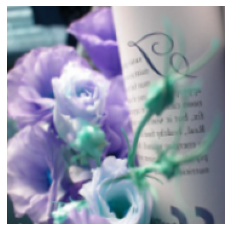

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

Train the model using data augmentation and a drop out layer

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)   

Epoch 1/30
86/86 [==============================] - 8s 54ms/step - loss: 1.3261 - accuracy: 0.4277
Epoch 2/30
86/86 [==============================] - 5s 54ms/step - loss: 1.0416 - accuracy: 0.5956
Epoch 3/30
86/86 [==============================] - 4s 50ms/step - loss: 0.9528 - accuracy: 0.6217
Epoch 4/30
86/86 [==============================] - 4s 49ms/step - loss: 0.8758 - accuracy: 0.6577
Epoch 5/30
86/86 [==============================] - 4s 50ms/step - loss: 0.8260 - accuracy: 0.6799
Epoch 6/30
86/86 [==============================] - 4s 50ms/step - loss: 0.7710 - accuracy: 0.6926
Epoch 7/30
86/86 [==============================] - 4s 50ms/step - loss: 0.7413 - accuracy: 0.7086
Epoch 8/30
86/86 [==============================] - 4s 50ms/step - loss: 0.7158 - accuracy: 0.7260
Epoch 9/30
86/86 [==============================] - 4s 50ms/step - loss: 0.6911 - accuracy: 0.7358
Epoch 10/30
86/86 [==============================] - 4s 50ms/step - loss: 0.6648 - accuracy: 0.7376
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 23ms/step - loss: 0.8274 - accuracy: 0.7495


[0.8273974061012268, 0.7494553327560425]